In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Akshay\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('Train.csv')
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
train.shape

(9146, 10)

In [4]:
test = pd.read_csv('Test.csv')
test.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [5]:
test.shape

(36584, 9)

In [6]:
train.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [7]:
test.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
dtype: int64

In [8]:
train.duplicated().sum()

93

In [9]:
test.duplicated().sum()

1150

In [10]:
train.drop_duplicates(keep= 'first', inplace= True)
train.shape

(9053, 10)

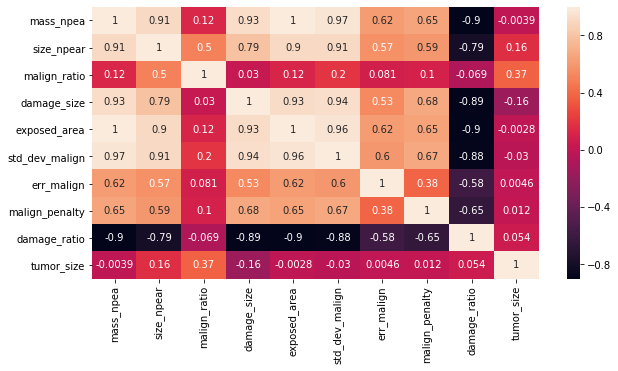

In [11]:
plt.figure(figsize= (10, 5))
sns.heatmap(train.corr(), annot= True)

In [12]:
train = train.rename({'mass_npea':'mass_area', 'size_npear':'size_area'}, axis = 1)
test = test.rename({'mass_npea':'mass_area', 'size_npear':'size_area'}, axis = 1)

In [13]:
x_train = train.drop('tumor_size', axis = 1)
y_train = train['tumor_size']
x_test = test

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print('Training score is', rf.score(x_train, y_train))
solution = pd.DataFrame({'tumor_size': y_pred})
solution.to_csv('Solution1.csv', index = False)

Training score is 0.9386884881042229


In [17]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective = 'regression', boosting = 'gbdt', metric = 'l2_root', learning_rate =0.02,num_iterations =2000,
         num_leaves = 200, max_depth = -1, min_data_in_leaf = 11, bagging_fraction =0.90, bagging_freq = 2,
         bagging_seed = 3, feature_fraction =  0.90, feature_fraction_seed = 2, max_bin = 1000)
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print('Training score is', lgbm.score(x_train, y_train))
solution = pd.DataFrame({'tumor_size': y_pred})
solution.to_csv('Solution2.csv', index = False)

C:\Users\Akshay\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training score is 0.9991649953537896
